In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import SVMIRandomBoxes
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.73it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:46<00:00,  9.43it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:46<00:00,  9.43it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.56it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.65it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.50it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:29<00:00,  6.71it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:43<00:00,  6.12it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:57<00:00,  5.62it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:16<00:00,  5.09it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.60it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:42<00:00,  3.54it/s]


[]

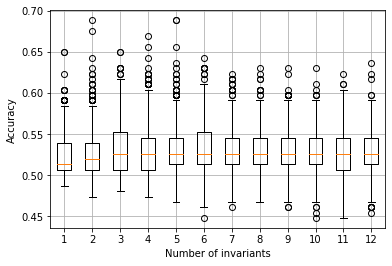

In [6]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

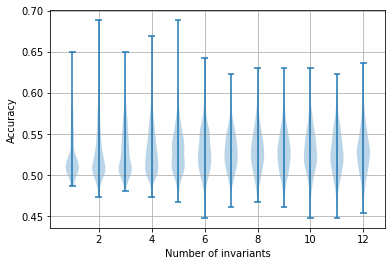

In [7]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [8]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.6493506493506493

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 0
Max. accuracy: 0.6883116883116883

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 0
Max. accuracy: 0.6493506493506493

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 0
Max. accuracy: 0.6688311688311688

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 0
Max. accuracy: 0.6883116883116883

Number of elements wi

In [9]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.3)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:29<00:00, 11.15it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.23it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.19it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:27<00:00,  6.77it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:26<00:00,  6.82it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:15<00:00,  7.37it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:45<00:00,  6.06it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:03<00:00,  5.44it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:16<00:00,  5.09it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.40it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:35<00:00,  4.65it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:11<00:00,  3.97it/s]


[]

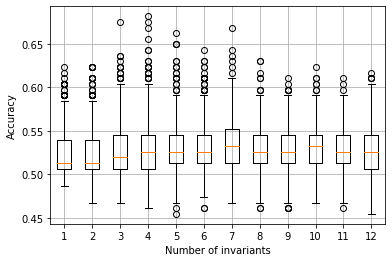

In [10]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

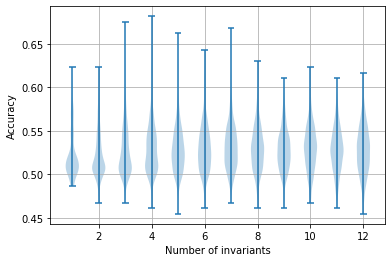

In [11]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [12]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.6233766233766234

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 0
Max. accuracy: 0.6233766233766234

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 0
Max. accuracy: 0.6753246753246753

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 0
Max. accuracy: 0.6818181818181818

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 0
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 0
Max. accuracy: 0.6623376623376623

Number of elements wi

# Trying different train/test partitions

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.29it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.45it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 17.97it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.17it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.29it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.79it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.27it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:03<00:00,  8.08it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:17<00:00,  7.25it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:50<00:00,  5.85it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:42<00:00,  6.16it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:02<00:00,  5.47it/s]


[]

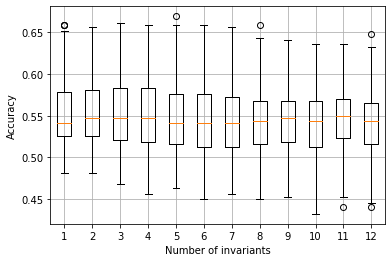

In [14]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

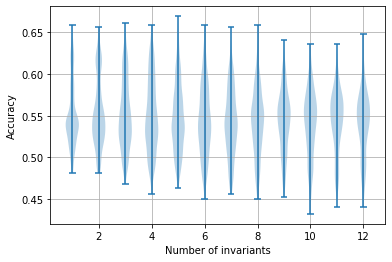

In [15]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [16]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 0
Number of elements with accuracy > 0.7421875 using 1 invariants: 0
Max. accuracy: 0.6588541666666666

Number of elements with accuracy >= 0.7421875 using 2 invariants: 0
Number of elements with accuracy > 0.7421875 using 2 invariants: 0
Max. accuracy: 0.65625

Number of elements with accuracy >= 0.7421875 using 3 invariants: 0
Number of elements with accuracy > 0.7421875 using 3 invariants: 0
Max. accuracy: 0.6614583333333334

Number of elements with accuracy >= 0.7421875 using 4 invariants: 0
Number of elements with accuracy > 0.7421875 using 4 invariants: 0
Max. accuracy: 0.6588541666666666

Number of elements with accuracy >= 0.7421875 using 5 invariants: 0
Number of elements with accuracy > 0.7421875 using 5 invariants: 0
Max. accuracy: 0.6692708333333334

Number of elements with accuracy >= 0.7421875 using 6 invariants: 0
Number of elements with accuracy > 0.7421875 using 6 invariants

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.22it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.33it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.24it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.44it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:19<00:00, 12.65it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:44<00:00,  9.56it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.91it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.52it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:19<00:00,  7.16it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:16<00:00,  7.31it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:33<00:00,  6.53it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.34it/s]


[]

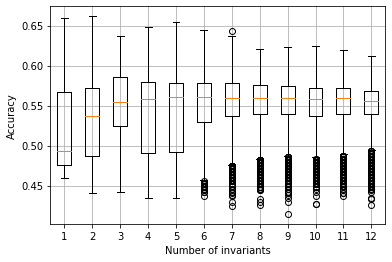

In [18]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

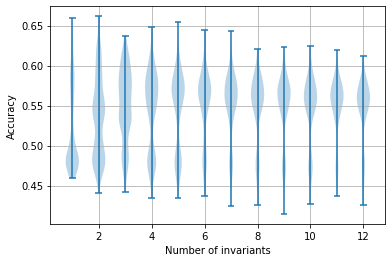

In [19]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [20]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 0
Max. accuracy: 0.6598513011152416

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 0
Max. accuracy: 0.6617100371747212

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 0
Max. accuracy: 0.637546468401487

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 0
Max. accuracy: 0.6486988847583643

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 0
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 0
Max. accuracy: 0.654275092936803

Number of elements with accuracy >

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.70it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.94it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.31it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:10<00:00,  7.66it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:40<00:00,  6.25it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:54<00:00,  2.09s/it]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:20<00:00,  2.12s/it]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:03<00:00,  2.10s/it]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:01<00:00,  2.10s/it]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:51<00:00,  2.09s/it]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:57<00:00,  2.10s/it]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:24<00:00,  2.12s/it]


[]

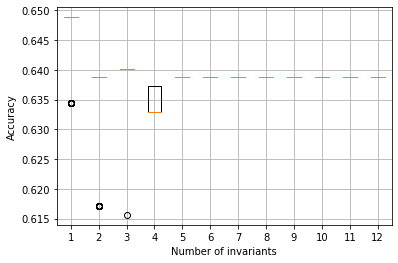

In [22]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

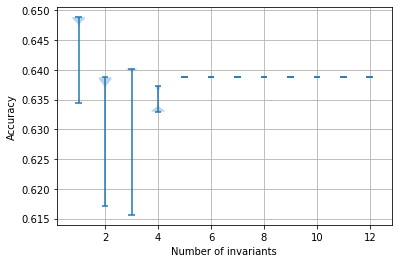

In [23]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [24]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 0
Max. accuracy: 0.6488439306358381

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 0
Max. accuracy: 0.638728323699422

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 0
Max. accuracy: 0.6401734104046243

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 0
Max. accuracy: 0.6372832369942196

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 0
Max. accuracy: 0.638728323699422

Number of elements with

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, only_positives=True)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.64it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.47it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [55:11<00:00,  3.31s/it]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [52:53<00:00,  3.17s/it]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [51:32<00:00,  3.09s/it]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [50:10<00:00,  3.01s/it]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [49:52<00:00,  2.99s/it]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [50:17<00:00,  3.02s/it]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [49:47<00:00,  2.99s/it]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [49:54<00:00,  2.99s/it]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [49:56<00:00,  3.00s/it]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [50:17<00:00,  3.02s/it]


[]

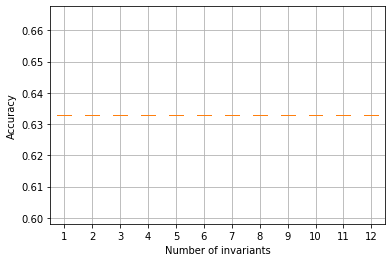

In [26]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

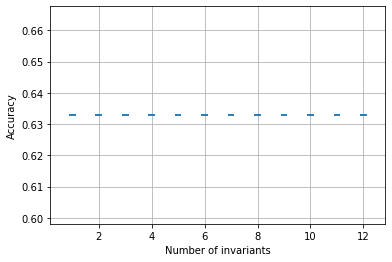

In [27]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [28]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 0
Max. accuracy: 0.6328767123287671

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 0
Max. accuracy: 0.6328767123287671

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 0
Max. accuracy: 0.6328767123287671

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 0
Max. accuracy: 0.6328767123287671

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 0
Max. accuracy: 0.6328767123287671

Number of elements with accuracy